# DSCI 417 – Homework 03
**Lauren Forti**

In [0]:
# imports
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr
import matplotlib.pyplot as plt
import pandas as pd

# create object
spark = SparkSession.builder.getOrCreate()

## Problem 1: Terminology

1. StructType
2. StructField
3. DoubleType()
4. show()
5. describe() and summary()
6. dropna()
7. col() and expr()
8. agg()
9. F.upper() and F.length()
10. filter()

## Problem 2: Columns and Expressions

Runs without errors: 1, 2, 5, 6, 7, 10

## Problem 3: Diamonds Data (Part 1)

In [0]:
# create schema
my_schema = 'carat DOUBLE, cut STRING, color STRING, clarity STRING, depth DOUBLE, table DOUBLE, price INTEGER, x DOUBLE, y DOUBLE, z DOUBLE'

# read file into df
diamonds = (
    spark.read
    .option('delimiter', '\t')
    .option('header', True)
    .schema(my_schema)
    .csv('/FileStore/tables/diamonds.txt')
)

# display schema
diamonds.printSchema()

root
-- carat: double (nullable = true)
-- cut: string (nullable = true)
-- color: string (nullable = true)
-- clarity: string (nullable = true)
-- depth: double (nullable = true)
-- table: double (nullable = true)
-- price: integer (nullable = true)
-- x: double (nullable = true)
-- y: double (nullable = true)
-- z: double (nullable = true)

In [0]:
# display # of rows
n = diamonds.count()
print(f'There are {n} row in the DataFrame.')

There are 53940 row in the DataFrame.

In [0]:
# display first 10 rows
diamonds.show(10)

+-----+---------+-----+-------+-----+-----+-----+----+----+----+
carat| cut|color|clarity|depth|table|price| x| y| z|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
 0.23| Ideal| E| SI2| 61.5| 55.0| 326|3.95|3.98|2.43|
 0.21| Premium| E| SI1| 59.8| 61.0| 326|3.89|3.84|2.31|
 0.23| Good| E| VS1| 56.9| 65.0| 327|4.05|4.07|2.31|
 0.29| Premium| I| VS2| 62.4| 58.0| 334| 4.2|4.23|2.63|
 0.31| Good| J| SI2| 63.3| 58.0| 335|4.34|4.35|2.75|
 0.24|Very Good| J| VVS2| 62.8| 57.0| 336|3.94|3.96|2.48|
 0.24|Very Good| I| VVS1| 62.3| 57.0| 336|3.95|3.98|2.47|
 0.26|Very Good| H| SI1| 61.9| 55.0| 337|4.07|4.11|2.53|
 0.22| Fair| E| VS2| 65.1| 61.0| 337|3.87|3.78|2.49|
 0.23|Very Good| H| VS1| 59.4| 61.0| 338| 4.0|4.05|2.39|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
only showing top 10 rows

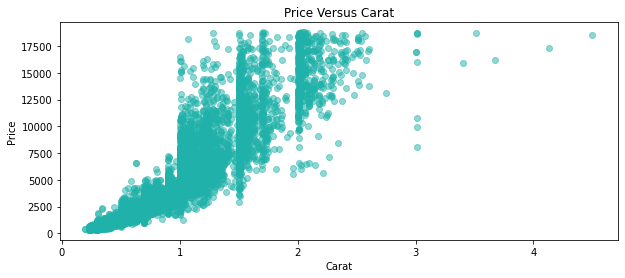

In [0]:
# draw a sample and convert to df
sample_pdf = diamonds.sample(fraction=0.25, seed=1).toPandas()

# make scatter plot
plt.figure(figsize = [10,4])
plt.scatter(sample_pdf.carat,
            sample_pdf.price,
            alpha = 0.5,
            c = 'lightseagreen'
           )

# add labels
plt.title('Price Versus Carat')
plt.xlabel('Carat')
plt.ylabel('Price')

# display scatter plot
plt.show()

## Problem 4: Diamonds Data (Part 2)

In [0]:
# sort by price desc and display first 5 rows
diamonds.sort('price', ascending = False).show(5)

+-----+---------+-----+-------+-----+-----+-----+----+----+----+
carat| cut|color|clarity|depth|table|price| x| y| z|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
 2.29| Premium| I| VS2| 60.8| 60.0|18823| 8.5|8.47|5.16|
 2.0|Very Good| G| SI1| 63.5| 56.0|18818| 7.9|7.97|5.04|
 1.51| Ideal| G| IF| 61.7| 55.0|18806|7.37|7.41|4.56|
 2.07| Ideal| G| SI2| 62.5| 55.0|18804| 8.2|8.13|5.11|
 2.0|Very Good| H| SI1| 62.8| 57.0|18803|7.95| 8.0|5.01|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
only showing top 5 rows

In [0]:
# sort by carat desc and display first 5 rows
diamonds.sort('carat', ascending = False).show(5)

+-----+-------+-----+-------+-----+-----+-----+-----+-----+----+
carat| cut|color|clarity|depth|table|price| x| y| z|
+-----+-------+-----+-------+-----+-----+-----+-----+-----+----+
 5.01| Fair| J| I1| 65.5| 59.0|18018|10.74|10.54|6.98|
 4.5| Fair| J| I1| 65.8| 58.0|18531|10.23|10.16|6.72|
 4.13| Fair| H| I1| 64.8| 61.0|17329| 10.0| 9.85|6.43|
 4.01|Premium| J| I1| 62.5| 62.0|15223|10.02| 9.94|6.24|
 4.01|Premium| I| I1| 61.0| 61.0|15223|10.14| 10.1|6.17|
+-----+-------+-----+-------+-----+-----+-----+-----+-----+----+
only showing top 5 rows

In [0]:
# create new df with calc'd col
diamonds_ppc = diamonds.select(
  '*',
  expr('round(price/carat, 2)').alias('price_per_carat')
)

# sort desc and show first 5 rows
diamonds_ppc.sort('price_per_carat', ascending=False).show(5)

+-----+---------+-----+-------+-----+-----+-----+----+----+----+---------------+
carat| cut|color|clarity|depth|table|price| x| y| z|price_per_carat|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+---------------+
 1.04|Very Good| D| IF| 61.3| 56.0|18542|6.53|6.55|4.01| 17828.85|
 1.07| Premium| D| IF| 60.9| 58.0|18279|6.67|6.57|4.03| 17083.18|
 1.03| Ideal| D| IF| 62.0| 56.0|17590|6.55|6.44|4.03| 17077.67|
 1.07|Very Good| D| IF| 60.9| 58.0|18114|6.57|6.67|4.03| 16928.97|
 1.02|Very Good| D| IF| 61.7| 59.0|17100|6.42|6.52|3.99| 16764.71|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+---------------+
only showing top 5 rows

In [0]:
# sort asc and show first 5 rows
diamonds_ppc.sort('price_per_carat').show(5)

+-----+-------+-----+-------+-----+-----+-----+----+----+----+---------------+
carat| cut|color|clarity|depth|table|price| x| y| z|price_per_carat|
+-----+-------+-----+-------+-----+-----+-----+----+----+----+---------------+
 0.43|Premium| H| I1| 62.0| 59.0| 452|4.78|4.83|2.98| 1051.16|
 0.32|Premium| E| I1| 60.9| 58.0| 345|4.38|4.42|2.68| 1078.13|
 0.31| Good| J| SI2| 63.3| 58.0| 335|4.34|4.35|2.75| 1080.65|
 0.33| Ideal| J| SI2| 62.4| 54.0| 366|4.43|4.45|2.77| 1109.09|
 0.31| Ideal| J| SI2| 62.2| 54.0| 344|4.35|4.37|2.71| 1109.68|
+-----+-------+-----+-------+-----+-----+-----+----+----+----+---------------+
only showing top 5 rows

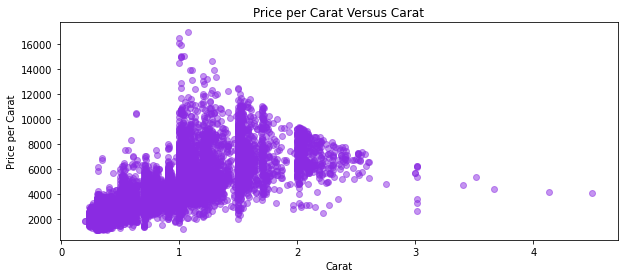

In [0]:
# draw a sample and convert to df
ppc_sample_pdf = diamonds_ppc.sample(fraction=0.25, seed=1).toPandas()

# make scatter plot
plt.figure(figsize = [10,4])
plt.scatter(ppc_sample_pdf.carat,
            ppc_sample_pdf.price_per_carat,
            alpha = 0.5,
            c = 'blueviolet'
           )

# add labels
plt.title('Price per Carat Versus Carat')
plt.xlabel('Carat')
plt.ylabel('Price per Carat')

# display scatter plot
plt.show()